In [1]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Split last week starting 4-22 two days val two days test

In [2]:
df = pd.read_csv('clean_sales.csv')

In [3]:
df

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49889,39021,2019-04-29,16:51:58,8,42.0,0,0,30,1,3.00,3.00,0
49890,39022,2019-04-29,16:51:14,8,42.0,8412,1,25,2,4.40,2.20,0
49891,39023,2019-04-29,11:17:36,8,15.0,0,1,31,1,2.20,2.20,0
49892,39024,2019-04-29,15:45:52,8,45.0,8030,0,44,2,5.00,2.50,0


In [4]:
df.transaction_date = pd.to_datetime(df.transaction_date)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  int64         
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  object        
 3   sales_outlet_id   49894 non-null  int64         
 4   staff_id          49894 non-null  float64       
 5   customer_id       49894 non-null  int64         
 6   is_instore        49894 non-null  object        
 7   product_id        49894 non-null  int64         
 8   quantity          49894 non-null  int64         
 9   line_item_amount  49894 non-null  float64       
 10  unit_price        49894 non-null  float64       
 11  is_promo          49894 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 4.6+ MB


8    17071
3    16829
5    15994
Name: sales_outlet_id, dtype: int64

In [6]:
train = df[df.transaction_date < '2019-04-22']

In [7]:
test = df[df.transaction_date >= '2019-04-22']

In [8]:
train

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36467,27870,2019-04-21,19:29:33,8,44.0,0,1,45,2,6.00,3.00,0
36468,27871,2019-04-21,15:15:09,8,44.0,0,1,87,1,3.00,3.00,0
36469,27872,2019-04-21,15:17:01,8,41.0,0,1,33,1,3.50,3.50,0
36470,27873,2019-04-21,19:39:27,8,43.0,0,0,49,1,3.00,3.00,0


## Explore

### Q1 what is the best selling store?

In [12]:
train.sales_outlet_id.value_counts()

8    12879
3    11991
5    11602
Name: sales_outlet_id, dtype: int64

In [10]:
stores_grouped = train.groupby('sales_outlet_id')['line_item_amount'].sum().reset_index()

In [11]:
stores_grouped

,sales_outlet_id,line_item_amount
0,3,55469.38
1,5,53721.67
2,8,60524.04


<AxesSubplot:xlabel='sales_outlet_id', ylabel='line_item_amount'>

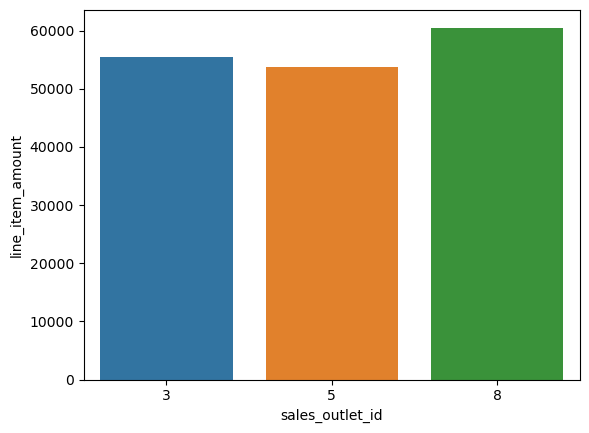

In [14]:
sns.barplot(data=stores_grouped, x='sales_outlet_id', y='line_item_amount')

### Q2 what are the sales by day for whole company?

In [15]:
daily_sales = train.groupby('transaction_date')['line_item_amount'].sum().reset_index()

In [19]:
daily_sales

,transaction_date,line_item_amount
0,2019-04-01,7462.00
1,2019-04-02,7269.10
2,2019-04-03,7461.25
3,2019-04-04,7086.45
4,2019-04-05,7236.25
5,2019-04-06,6513.75
6,2019-04-07,7693.73
7,2019-04-08,8837.54
8,2019-04-09,8355.48
9,2019-04-10,8210.48


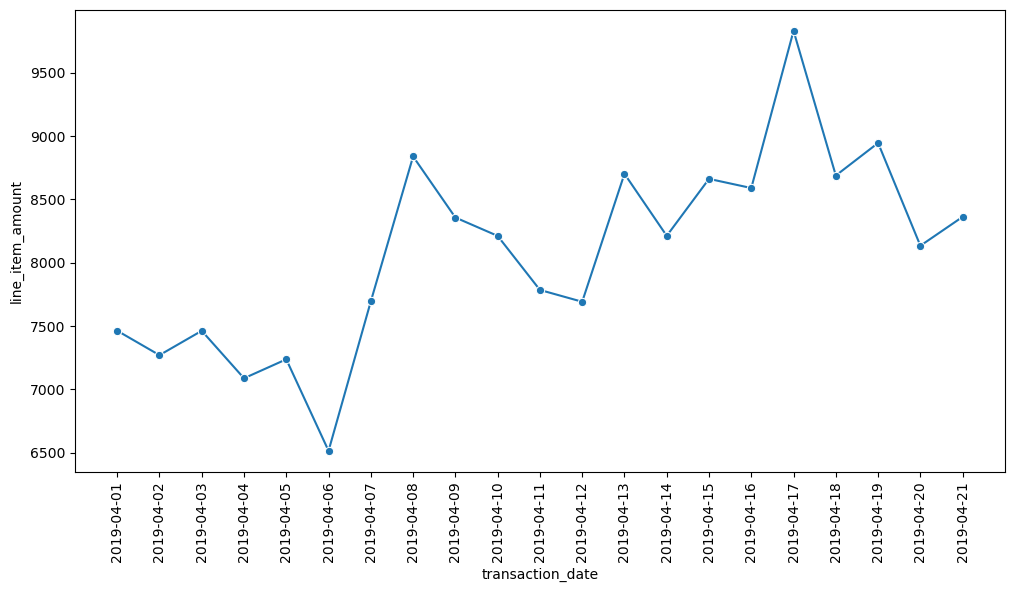

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='transaction_date', y='line_item_amount', marker='o')
plt.xticks(daily_sales.transaction_date, rotation=90)
plt.show()

### Q3 daily sales by store?

In [41]:
train


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36467,27870,2019-04-21,19:29:33,8,44.0,0,1,45,2,6.00,3.00,0
36468,27871,2019-04-21,15:15:09,8,44.0,0,1,87,1,3.00,3.00,0
36469,27872,2019-04-21,15:17:01,8,41.0,0,1,33,1,3.50,3.50,0
36470,27873,2019-04-21,19:39:27,8,43.0,0,0,49,1,3.00,3.00,0


In [43]:
daily_store_sales = train.groupby(['transaction_date', 'sales_outlet_id'])['line_item_amount'].sum().reset_index()

In [44]:
daily_store_sales

,transaction_date,sales_outlet_id,line_item_amount
0,2019-04-01,3,2571.40
1,2019-04-01,5,2330.45
2,2019-04-01,8,2560.15
3,2019-04-02,3,2701.50
4,2019-04-02,5,2090.00
...,...,...,...
58,2019-04-20,5,2894.13
59,2019-04-20,8,2713.45
60,2019-04-21,3,2393.08
61,2019-04-21,5,2744.05


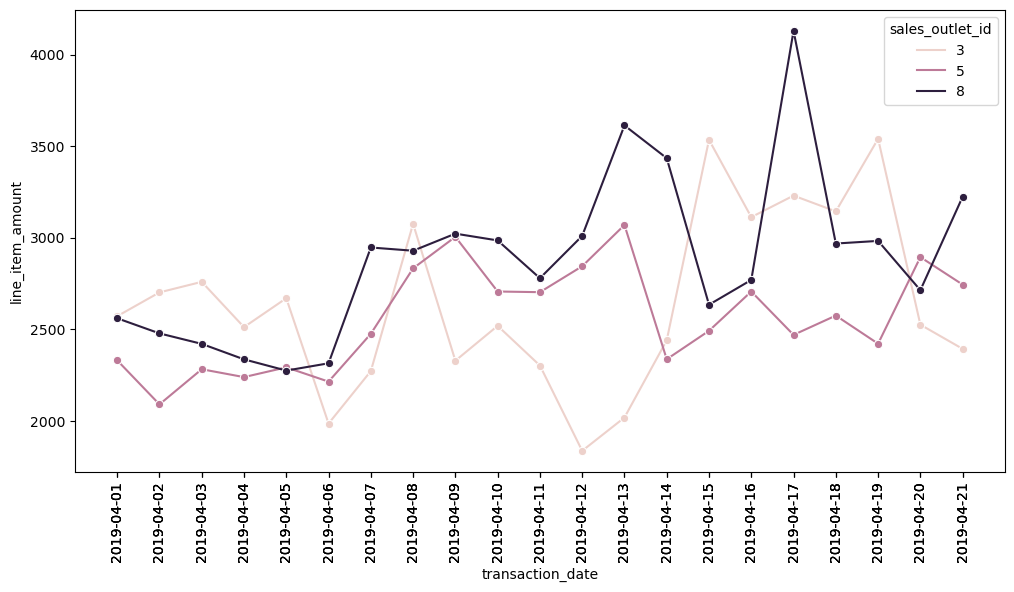

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_store_sales, x='transaction_date', y='line_item_amount', marker='o', hue='sales_outlet_id')
 

plt.xticks(daily_store_sales.transaction_date, rotation=90)
plt.show()

### Q4 what is the best selling product?

In [92]:
product_grouped = train.groupby('product_id')['line_item_amount'].sum().reset_index()

In [61]:
product_grouped

,product_id,line_item_amount
0,1,1044.00
1,2,918.00
2,3,619.50
3,4,797.55
4,5,600.00
...,...,...
75,81,1754.00
76,82,862.00
77,83,1296.00
78,84,583.20


In [80]:
products = pd.read_csv('product.csv')

In [69]:
products = products[['product', 'product_id']]

In [73]:
product_grouped = pd.merge(product_grouped, products, on='product_id')

In [77]:
product_grouped.sort_values('line_item_amount', ascending=False).head(50)

,product_id,line_item_amount,product
60,61,5115.75,Sustainably Grown Organic Lg
58,59,4972.50,Dark chocolate Lg
38,39,4462.50,Latte Rg
40,41,4415.75,Cappuccino Lg
54,55,4296.00,Morning Sunrise Chai Lg
59,60,3986.25,Sustainably Grown Organic Rg
37,38,3978.75,Latte
35,36,3926.25,Jamaican Coffee River Lg
7,8,3870.00,Civet Cat
39,40,3843.75,Cappuccino


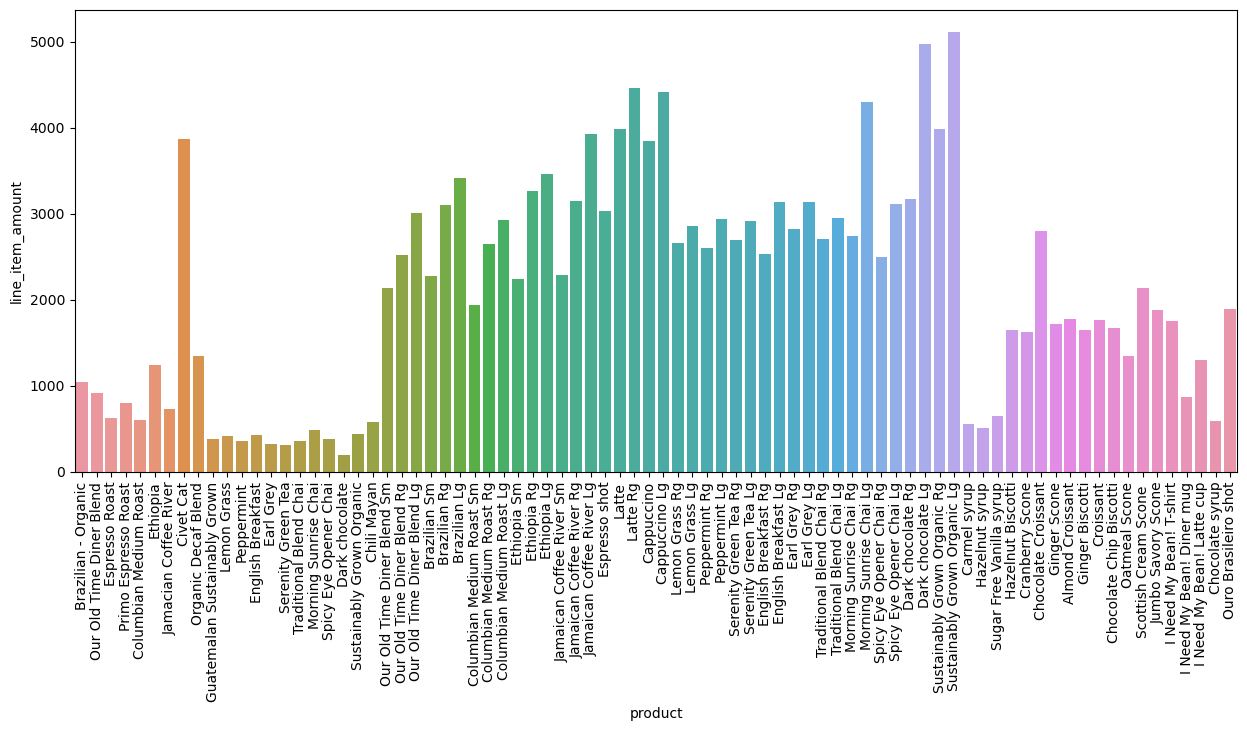

In [74]:
plt.figure(figsize=(15, 6))
sns.barplot(data=product_grouped, x='product', y='line_item_amount')
plt.xticks(rotation=90)
plt.show()

### Q5 What product by grouping does the best in sales?

In [81]:
products = products[['product_group', 'product_id']]

In [93]:
product_grouped = pd.merge(product_grouped, products, on='product_id')

In [94]:
product_grouped

,product_id,line_item_amount,product_group
0,1,1044.00,Whole Bean/Teas
1,2,918.00,Whole Bean/Teas
2,3,619.50,Whole Bean/Teas
3,4,797.55,Whole Bean/Teas
4,5,600.00,Whole Bean/Teas
...,...,...,...
75,81,1754.00,Merchandise
76,82,862.00,Merchandise
77,83,1296.00,Merchandise
78,84,583.20,Add-ons


In [96]:
 group_sums = product_grouped.groupby('product_group')['line_item_amount'].sum().reset_index()

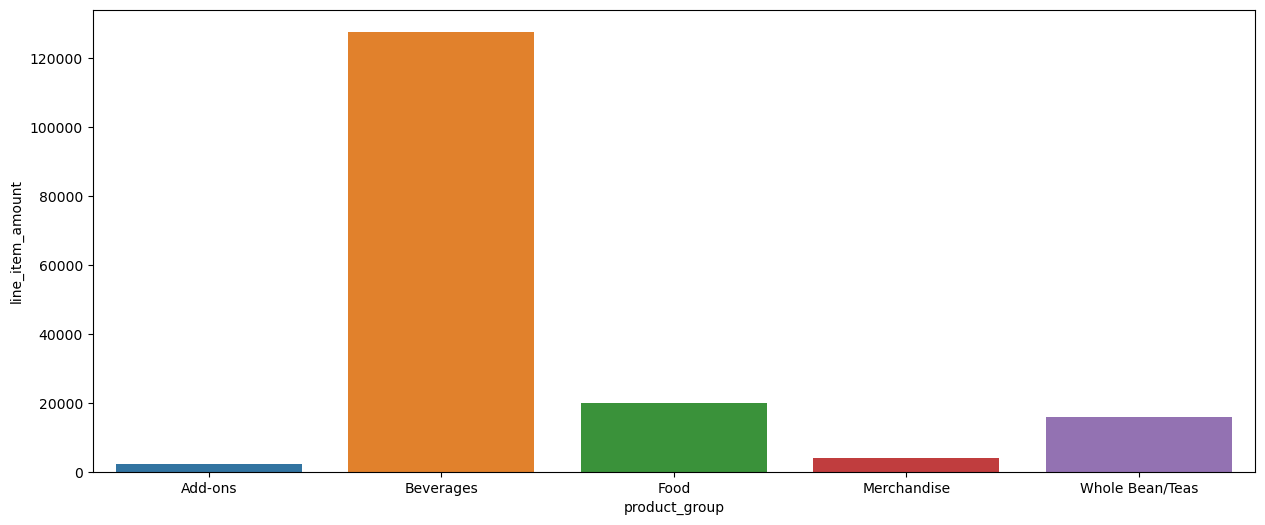

In [98]:
plt.figure(figsize=(15, 6))
sns.barplot(data=group_sums, x='product_group', y='line_item_amount')
plt.show()

In [99]:
group_sums

,product_group,line_item_amount
0,Add-ons,2289.60
1,Beverages,127720.30
2,Food,19992.75
3,Merchandise,3912.00
4,Whole Bean/Teas,15800.44


In [112]:
total_amount = group_sums['line_item_amount'].sum()

# Calculate the percentage for each product_group
group_sums['percentage'] = round((group_sums['line_item_amount'] / total_amount), 2)


In [113]:
group_sums

,product_group,line_item_amount,percentage
0,Add-ons,2289.60,0.01
1,Beverages,127720.30,0.75
2,Food,19992.75,0.12
3,Merchandise,3912.00,0.02
4,Whole Bean/Teas,15800.44,0.09


### Q6 Which items are purchanced more often?

In [114]:
products_by_quantity = train[['product_id', 'quantity']]

In [118]:
products_by_quantity = products_by_quantity.groupby('product_id').sum()

In [121]:
products = pd.read_csv('product.csv')

In [122]:
products = products[['product', 'product_id']]

In [123]:
products

,product,product_id
0,Brazilian - Organic,1
1,Our Old Time Diner Blend,2
2,Espresso Roast,3
3,Primo Espresso Roast,4
4,Columbian Medium Roast,5
...,...,...
83,Chocolate syrup,84
84,Rio Nights,85
85,Ouro Brasileiro shot,87
86,Ouro Brasileiro shot promo,88


In [124]:
products_by_quantity = pd.merge(products_by_quantity, products, on='product_id')

In [125]:
products_by_quantity

,product_id,quantity,product
0,1,58,Brazilian - Organic
1,2,51,Our Old Time Diner Blend
2,3,42,Espresso Roast
3,4,39,Primo Espresso Roast
4,5,40,Columbian Medium Roast
...,...,...,...
75,81,63,I Need My Bean! T-shirt
76,82,70,I Need My Bean! Diner mug
77,83,90,I Need My Bean! Latte cup
78,84,727,Chocolate syrup


In [128]:
products_by_quantity = products_by_quantity.sort_values('quantity', ascending=False)

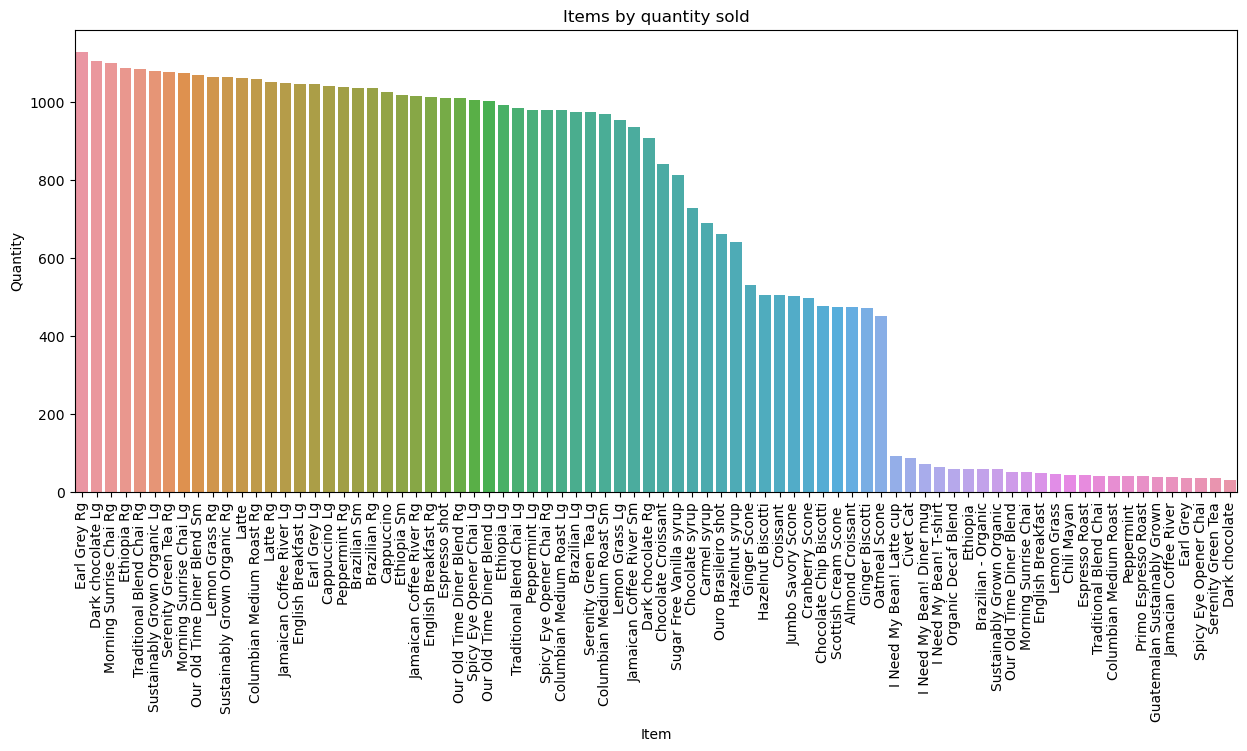

In [130]:
plt.figure(figsize=(15, 6))
sns.barplot(data=products_by_quantity, x='product', y='quantity')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('Items by quantity sold')
plt.show()

In [131]:
train

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36467,27870,2019-04-21,19:29:33,8,44.0,0,1,45,2,6.00,3.00,0
36468,27871,2019-04-21,15:15:09,8,44.0,0,1,87,1,3.00,3.00,0
36469,27872,2019-04-21,15:17:01,8,41.0,0,1,33,1,3.50,3.50,0
36470,27873,2019-04-21,19:39:27,8,43.0,0,0,49,1,3.00,3.00,0


### What can the data tell me about customers with a membership (ie customer id != 0)?

In [195]:
membership_customers = train[train.customer_id != 0]

In [168]:
membership_customers

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36434,27846,2019-04-21,15:05:57,8,43.0,8009,0,50,1,2.50,2.50,0
36435,27846,2019-04-21,15:05:57,8,43.0,8009,0,75,1,3.50,3.50,0
36445,27854,2019-04-21,16:54:05,8,44.0,8365,1,51,1,3.00,3.00,0
36456,27862,2019-04-21,13:10:21,8,43.0,8020,0,29,2,5.00,2.50,0


In [146]:
grouped_membership_customers = membership_customers.groupby(membership_customers.customer_id).sum()

In [151]:
grouped_membership_customers = grouped_membership_customers.drop(columns=['sales_outlet_id', 'staff_id', 'product_id', 'unit_price', 'is_promo', 'transaction_id'])

In [152]:
grouped_membership_customers

,quantity,line_item_amount
customer_id,,
1,6,14.00
2,17,62.10
3,43,184.15
4,9,24.00
5,5,15.50
...,...,...
8497,16,61.10
8498,10,29.75
8499,14,46.00


In [153]:
grouped_membership_customers.line_item_amount.mean()

40.45142156862742

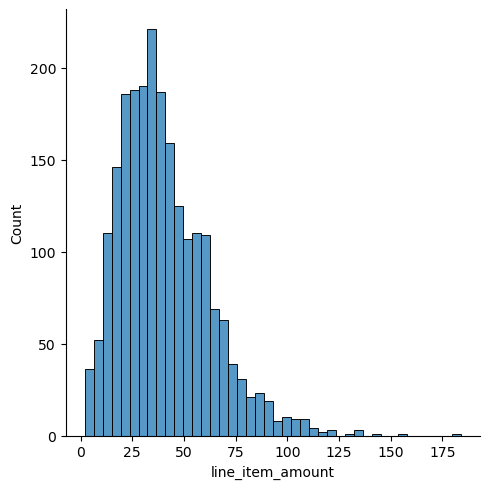

In [166]:
sns.displot(grouped_membership_customers[grouped_membership_customers.line_item_amount < 200], x='line_item_amount')
plt.show()

### What is the average time between transactions for the membership customers?

In [405]:
membership_customers_visits_avg = membership_customers[['customer_id','transaction_time', 'transaction_date']]

In [406]:
membership_customers_visits_avg.transaction_date = membership_customers_visits_avg.transaction_date.astype(str)

In [407]:
membership_customers_visits_avg['transaction_datetime'] = membership_customers_visits_avg.transaction_date + ' ' + membership_customers_visits_avg.transaction_time

In [408]:
membership_customers_visits_avg

,customer_id,transaction_time,transaction_date,transaction_datetime
0,558,12:04:43,2019-04-01,2019-04-01 12:04:43
1,781,15:54:39,2019-04-01,2019-04-01 15:54:39
2,788,14:34:59,2019-04-01,2019-04-01 14:34:59
3,683,16:06:04,2019-04-01,2019-04-01 16:06:04
4,99,19:18:37,2019-04-01,2019-04-01 19:18:37
...,...,...,...,...
36434,8009,15:05:57,2019-04-21,2019-04-21 15:05:57
36435,8009,15:05:57,2019-04-21,2019-04-21 15:05:57
36445,8365,16:54:05,2019-04-21,2019-04-21 16:54:05
36456,8020,13:10:21,2019-04-21,2019-04-21 13:10:21


In [409]:
membership_customers_visits_avg.transaction_datetime = pd.to_datetime(membership_customers_visits_avg.transaction_datetime)

In [410]:
membership_customers_visits_avg.drop(columns=['transaction_time', 'transaction_date'], inplace=True)

In [411]:
membership_customers_visits_avg.sort_values(by='transaction_datetime', inplace=True)

In [412]:
membership_customers_visits_avg.drop_duplicates(inplace=True)

In [413]:
membership_customers_visits_avg['hours_between'] = membership_customers_visits_avg.groupby('customer_id')['transaction_datetime'].diff().dt.total_seconds() 

In [414]:
membership_customers_visits_avg.dropna(inplace=True)

In [417]:
 test = membership_customers_visits_avg.groupby(['customer_id'])['hours_between'].mean()

In [418]:
test = pd.DataFrame(test)

In [420]:
test.hours_between = test.hours_between/3600

In [422]:
test.hours_between.mean()

65.20740715588167

In [416]:
membership_customers_visits_avg

,customer_id,transaction_datetime,hours_between
842,5162,2019-04-01 07:44:35,1314.0
1045,5676,2019-04-01 08:09:36,2952.0
1579,8397,2019-04-01 08:41:23,567.0
833,5895,2019-04-01 08:45:52,5816.0
979,5543,2019-04-01 08:52:12,5183.0
...,...,...,...
36290,8060,2019-04-21 20:36:32,471800.0
36351,8373,2019-04-21 20:39:18,307545.0
36346,8364,2019-04-21 20:44:43,567078.0
36432,8221,2019-04-21 20:52:25,706362.0


[]

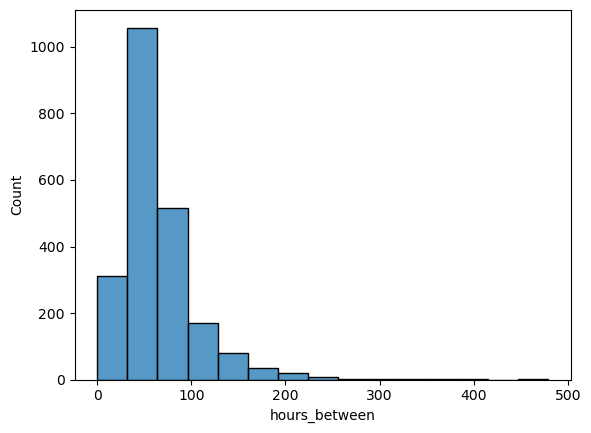

In [428]:
sns.histplot(data=test, x='hours_between', bins=15)
plt.plot()

In [423]:
test

,hours_between
customer_id,
1,133.881389
2,43.068561
3,34.550655
4,75.006389
5,92.629537
...,...
8497,39.312361
8498,59.251556
8499,59.616840


In [443]:
train

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,is_instore,product_id,quantity,line_item_amount,unit_price,is_promo
0,1,2019-04-01,12:04:43,3,12.0,558,0,52,1,2.50,2.50,0
1,2,2019-04-01,15:54:39,3,17.0,781,0,27,2,7.00,3.50,0
2,3,2019-04-01,14:34:59,3,17.0,788,1,46,2,5.00,2.50,0
3,4,2019-04-01,16:06:04,3,12.0,683,0,23,2,5.00,2.50,0
4,5,2019-04-01,19:18:37,3,17.0,99,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36467,27870,2019-04-21,19:29:33,8,44.0,0,1,45,2,6.00,3.00,0
36468,27871,2019-04-21,15:15:09,8,44.0,0,1,87,1,3.00,3.00,0
36469,27872,2019-04-21,15:17:01,8,41.0,0,1,33,1,3.50,3.50,0
36470,27873,2019-04-21,19:39:27,8,43.0,0,0,49,1,3.00,3.00,0


### Let's look at product waste

In [457]:
pastry_train = pd.read_csv('pastry inventory.csv')

In [458]:
pastry_train.transaction_date = pd.to_datetime(pastry_train.transaction_date)

In [459]:
pastry_train = pastry_train[pastry_train.transaction_date < '2019-04-22']

In [460]:
pastry_train

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,2019-04-01,69,18,8,10,56%
1,3,2019-04-01,70,18,12,6,33%
2,3,2019-04-01,71,18,8,10,56%
3,3,2019-04-01,72,48,9,39,81%
4,3,2019-04-01,73,18,9,9,50%
...,...,...,...,...,...,...,...
272,8,2019-04-21,69,18,6,12,67%
273,8,2019-04-21,70,18,5,13,72%
274,8,2019-04-21,71,18,16,2,11%
275,8,2019-04-21,72,48,31,17,58%


In [461]:
pastry_train.rename(columns={'% waste': 'waste_percent'}, inplace=True)

In [464]:
pastry_train.waste_percent = pastry_train.waste_percent.str.replace('%', '').astype(int)

In [465]:
pastry_train

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,waste_percent
0,3,2019-04-01,69,18,8,10,56
1,3,2019-04-01,70,18,12,6,33
2,3,2019-04-01,71,18,8,10,56
3,3,2019-04-01,72,48,9,39,81
4,3,2019-04-01,73,18,9,9,50
...,...,...,...,...,...,...,...
272,8,2019-04-21,69,18,6,12,67
273,8,2019-04-21,70,18,5,13,72
274,8,2019-04-21,71,18,16,2,11
275,8,2019-04-21,72,48,31,17,58


In [482]:
waste_company = pastry_train.groupby('transaction_date')['waste'].mean()

In [483]:
pastry_train[pastry_train.sales_outlet_id ==3]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,waste_percent
0,3,2019-04-01,69,18,8,10,56
1,3,2019-04-01,70,18,12,6,33
2,3,2019-04-01,71,18,8,10,56
3,3,2019-04-01,72,48,9,39,81
4,3,2019-04-01,73,18,9,9,50
...,...,...,...,...,...,...,...
92,3,2019-04-21,69,18,6,12,67
93,3,2019-04-21,70,18,3,15,83
94,3,2019-04-21,71,18,3,15,83
95,3,2019-04-21,72,48,22,26,77


In [469]:
pastry_train[pastry_train.sales_outlet_id == 5]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,waste_percent
97,5,2019-04-07,69,18,4,14,78
98,5,2019-04-07,70,18,7,11,61
99,5,2019-04-07,71,18,8,10,56
100,5,2019-04-07,72,48,10,38,83
101,5,2019-04-07,73,18,5,13,72
...,...,...,...,...,...,...,...
167,5,2019-04-21,69,18,10,8,44
168,5,2019-04-21,70,18,7,11,61
169,5,2019-04-21,71,18,12,6,33
170,5,2019-04-21,72,48,20,28,58


In [470]:
pastry_train[pastry_train.sales_outlet_id == 8]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,waste_percent
202,8,2019-04-07,69,18,10,8,44
203,8,2019-04-07,70,18,15,3,17
204,8,2019-04-07,71,18,9,9,50
205,8,2019-04-07,72,48,1,47,92
206,8,2019-04-07,73,18,9,9,50
...,...,...,...,...,...,...,...
272,8,2019-04-21,69,18,6,12,67
273,8,2019-04-21,70,18,5,13,72
274,8,2019-04-21,71,18,16,2,11
275,8,2019-04-21,72,48,31,17,58


In [484]:
waste_company = pd.DataFrame(waste_company)

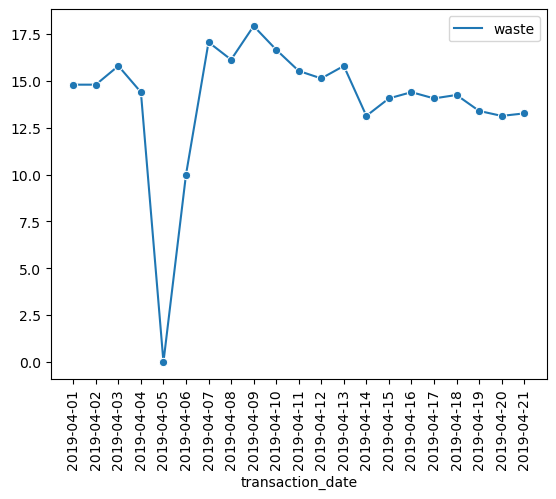

In [485]:
sns.lineplot(data=waste_company, marker='o')
plt.xticks(waste_company.index, rotation=90)

plt.show()

In [486]:
waste_by_store = pastry_train.groupby(['transaction_date', 'sales_outlet_id'])['waste'].mean()

In [488]:
waste_by_store = pd.DataFrame(waste_by_store)

In [495]:
waste_by_store.reset_index(inplace=True)

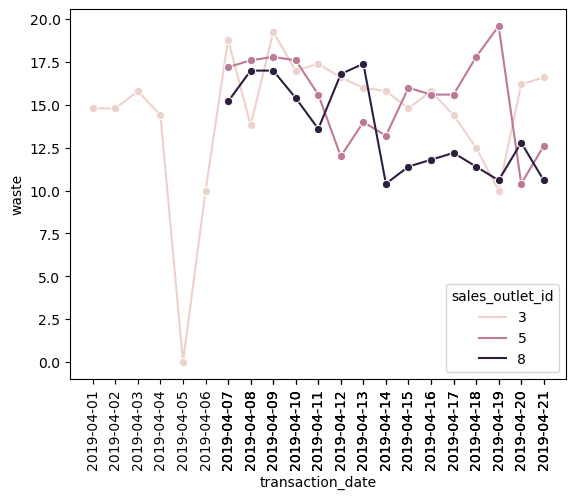

In [498]:
sns.lineplot(data=waste_by_store, x=waste_by_store.transaction_date, y=waste_by_store.waste, marker='o', hue='sales_outlet_id')
plt.xticks(waste_by_store.transaction_date, rotation=90)

plt.show()

In [501]:
waste_by_product = pastry_train.groupby(['transaction_date', 'product_id'])['waste'].mean()

In [502]:
waste_by_product = pd.DataFrame(waste_by_product)

In [504]:
waste_by_product.reset_index(inplace=True)

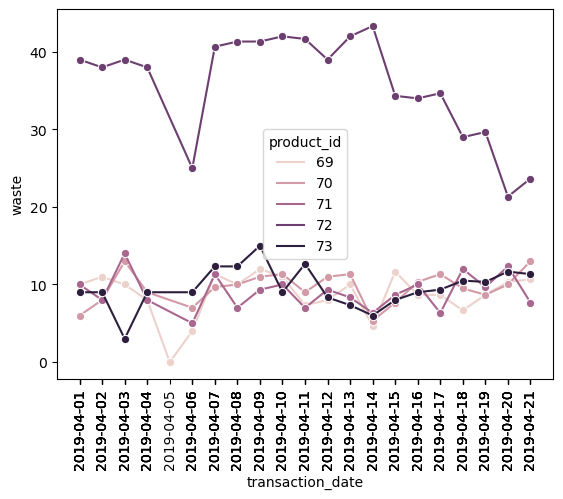

In [510]:
sns.lineplot(data=waste_by_product, x=waste_by_product.transaction_date, y=waste_by_product.waste, marker='o', hue='product_id')
plt.xticks(waste_by_product.transaction_date, rotation=90)

plt.show()

In [509]:
waste_by_product

,transaction_date,product_id,waste
0,2019-04-01,69,10.000000
1,2019-04-01,70,6.000000
2,2019-04-01,71,10.000000
3,2019-04-01,72,39.000000
4,2019-04-01,73,9.000000
...,...,...,...
96,2019-04-21,69,10.666667
97,2019-04-21,70,13.000000
98,2019-04-21,71,7.666667
99,2019-04-21,72,23.666667
